In [94]:
#!pip install pylint
!pylint /content/drive/MyDrive/"Colab Notebooks"/pred-car-prices.ipynb

************* Module pred-car-prices
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:0: C0304: Final newline missing (missing-final-newline)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:0: C0301: Line too long (60009/100) (line-too-long)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:0: C0103: Module name "pred-car-prices" doesn't conform to snake_case naming style (invalid-name)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:0: C0114: Missing module docstring (missing-module-docstring)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:0: W0104: Statement seems to have no effect (pointless-statement)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:3746: E0602: Undefined variable 'null' (undefined-variable)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:3775: E0602: Undefined variable 'true' (undefined-variable)
drive/MyDrive/Colab Notebooks/pred-car-prices.ipynb:1:4263: E0602: Undefined variable 'null' (undefined-variable)
drive/MyDrive/Col

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [ ]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 'curb-weight',
        'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
        'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

In [ ]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width',
                          'height', 'curb-weight', 'engine-size', 'bore',
                          'stroke', 'compression-rate', 'horsepower',
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [ ]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

In [ ]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

In [ ]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

In [ ]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [ ]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars -
                numeric_cars.min())/(numeric_cars.max() -
                                     numeric_cars.min())
numeric_cars['price'] = price_col


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)

    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    knn.fit(train_df[[train_col]], train_df[target_col])

    predicted_labels = knn.predict(test_df[[train_col]])

    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse


rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


In [ ]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)

    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        predicted_labels = knn.predict(test_df[[train_col]])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)

        k_rmses[k] = rmse
    return k_rmses


k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results


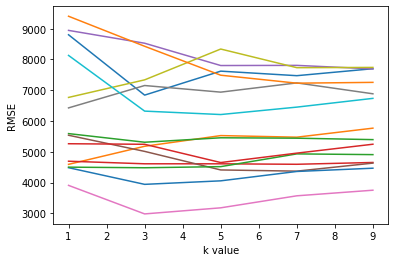

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())

    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


In [ ]:
feature_avg_rmse = {}
for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index


engine-size          3476.756279
horsepower           4260.515870
width                4630.880137
city-mpg             4666.762336
curb-weight          4791.679591
highway-mpg          5070.560474
wheel-base           5306.966661
length               5437.701635
compression-rate     6769.339907
bore                 6927.409424
stroke               7582.808260
normalized-losses    7686.730517
peak-rpm             7960.726357
height               8154.717180
dtype: float64



In [ ]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)

    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    last_train_row = int(len(rand_df) / 2)

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]

    k_values = [5]
    k_rmses = {}

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        predicted_labels = knn.predict(test_df[train_cols])

        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)

        k_rmses[k] = rmse
    return k_rmses


k_rmse_results = {}

for nr_best_feats in range(2, 7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results
